In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# read and check data

In [2]:
data = pd.read_csv('/kaggle/input/2023-data-scientists-salary/ds_salaries.csv')

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


# Variable Description

In [5]:
# unique values of categorical titles
for i in data.select_dtypes(include=(object)).columns:
    print(f"{i}:\n{data[i].unique()} \n{'*'*50}")

experience_level:
['SE' 'MI' 'EN' 'EX'] 
**************************************************
employment_type:
['FT' 'CT' 'FL' 'PT'] 
**************************************************
job_title:
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'A

# Data cleaning with misingno vizualization

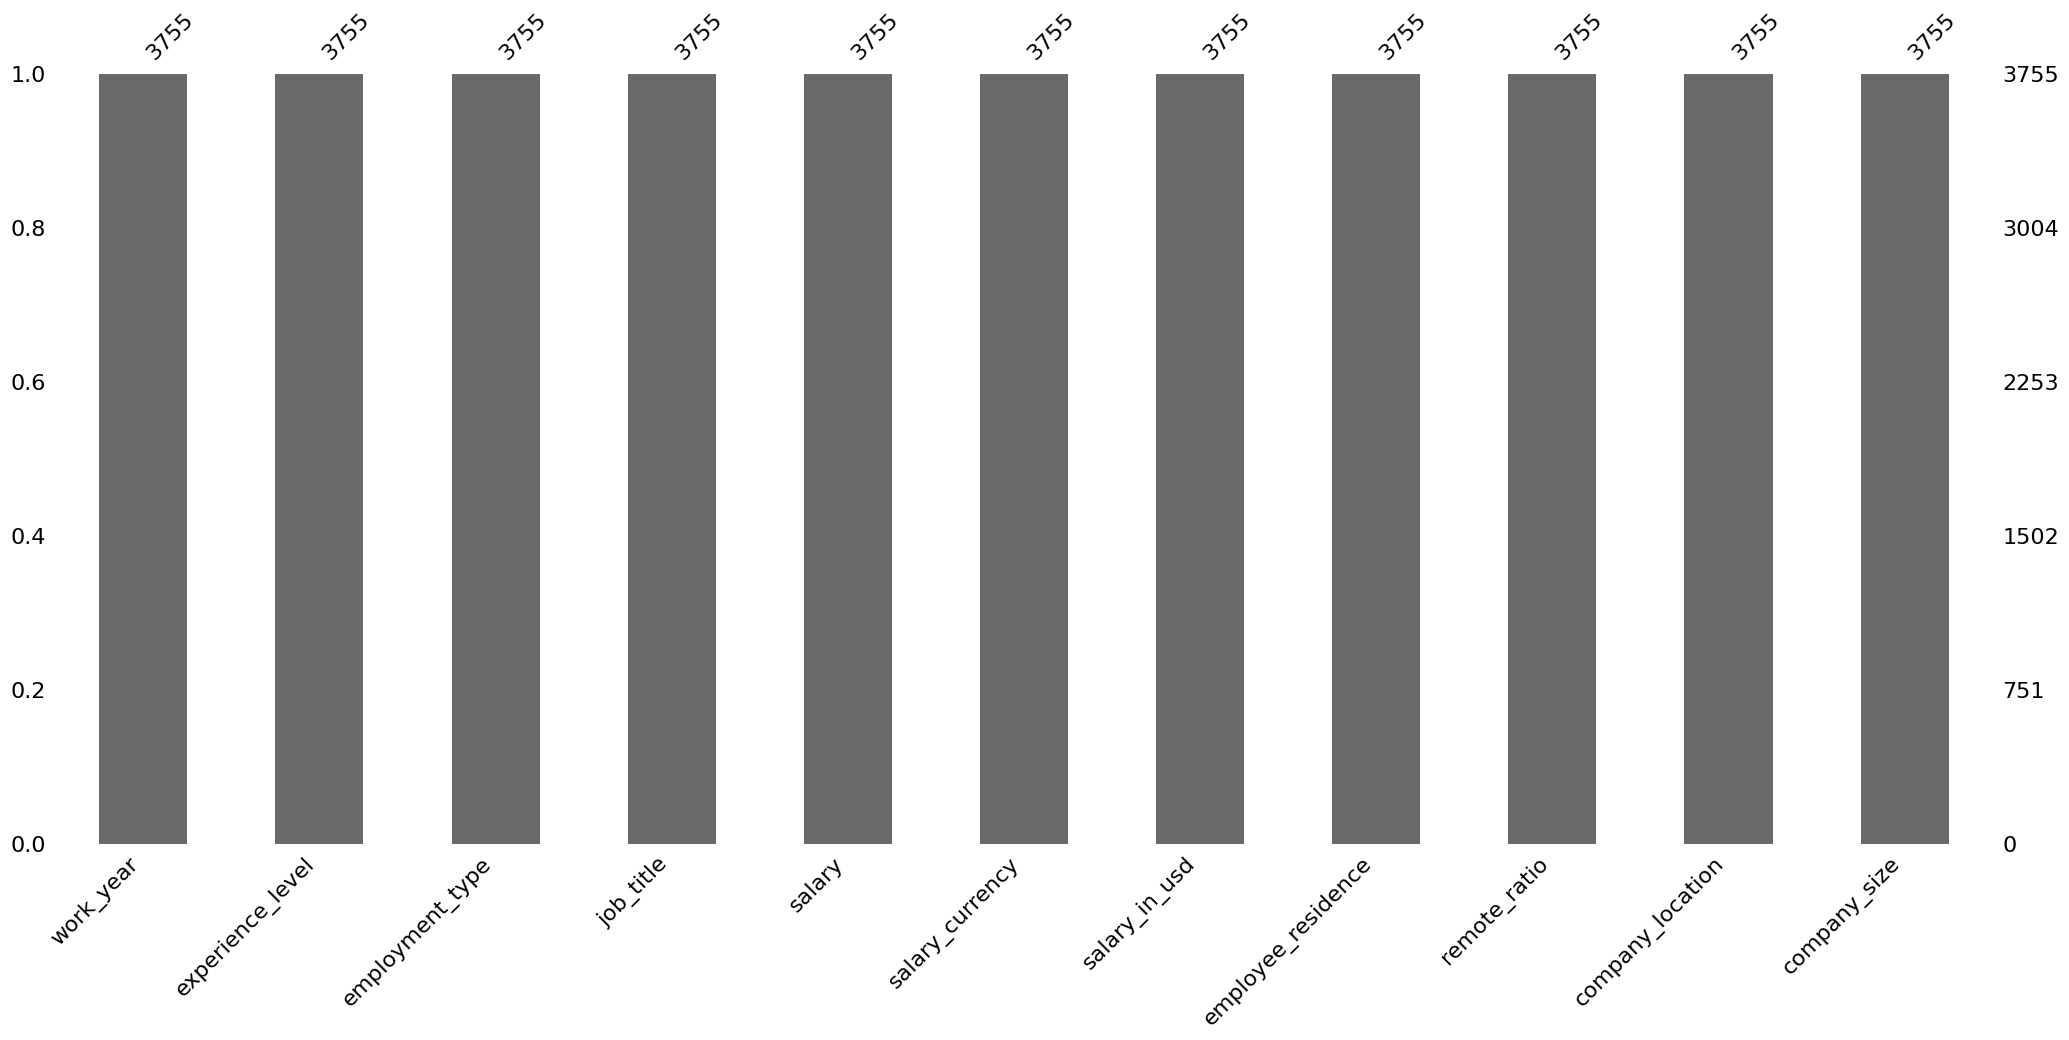

In [6]:
import missingno as msno
msno.bar(data)
plt.show()

## There is no null variable we can move

# Univariate Description Analysis

In [7]:
data_numeric=data.select_dtypes(include=np.number)
data_categorical=data.select_dtypes(include=object)

## Numeric Description 

In [8]:
data_numeric[['work_year','salary_in_usd']].groupby(['work_year'],as_index=False).mean().sort_values(by='salary_in_usd',ascending=False)

,work_year,salary_in_usd
3,2023,149045.541176
2,2022,133338.620793
1,2021,94087.208696
0,2020,92302.631579


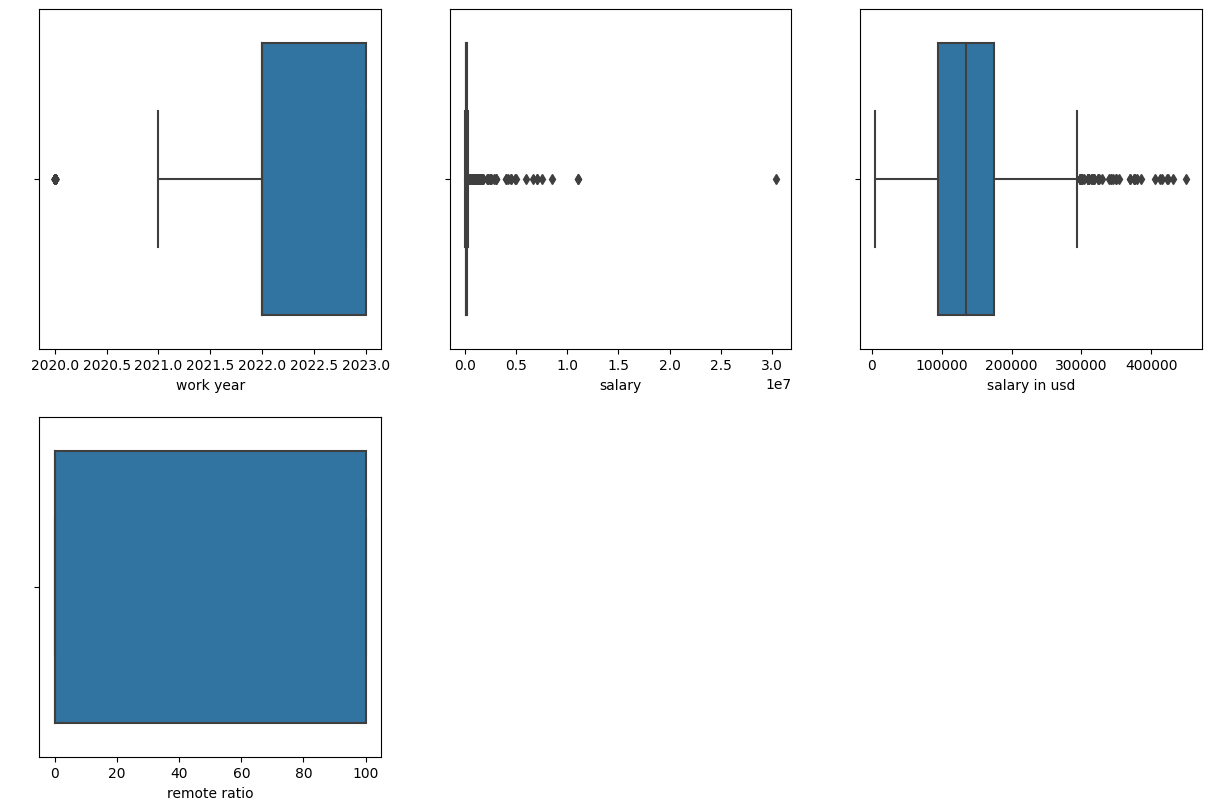

In [9]:
plt.figure(figsize=(15,15))
col=data_numeric.columns     
for i in range(len(col)):
        
    plt.subplot(3,3,i+1)
    
    sns.boxplot(x=data[col[i]])
       
    plt.xlabel(col[i].replace('_'," "))
    plt.ylabel(' ')

# Categorical Description

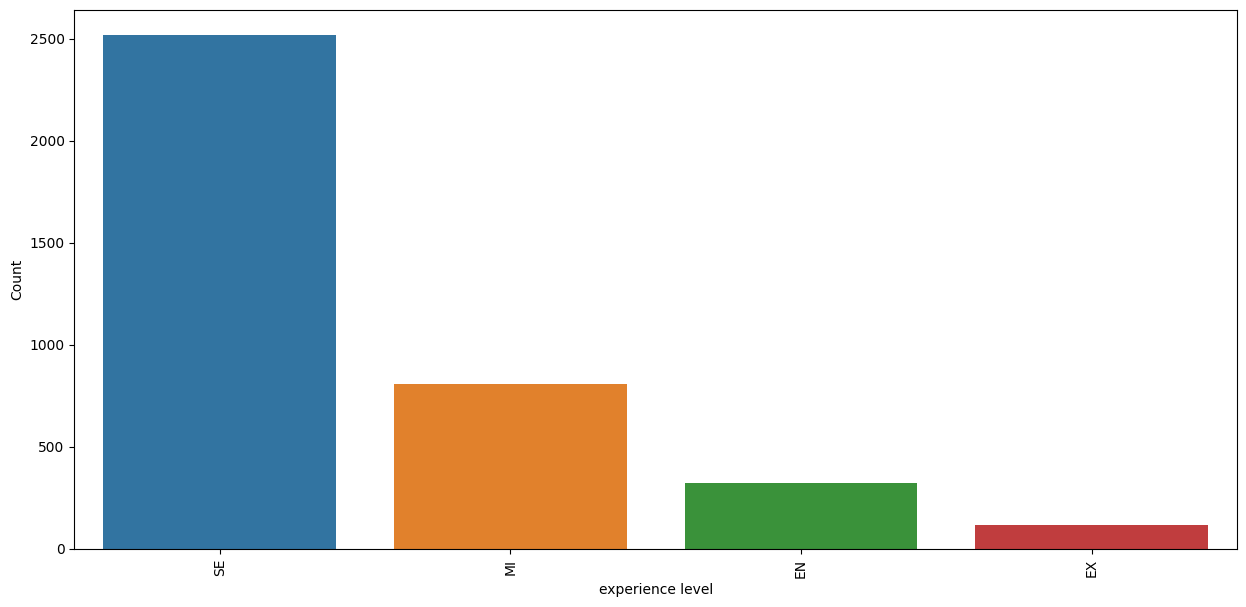

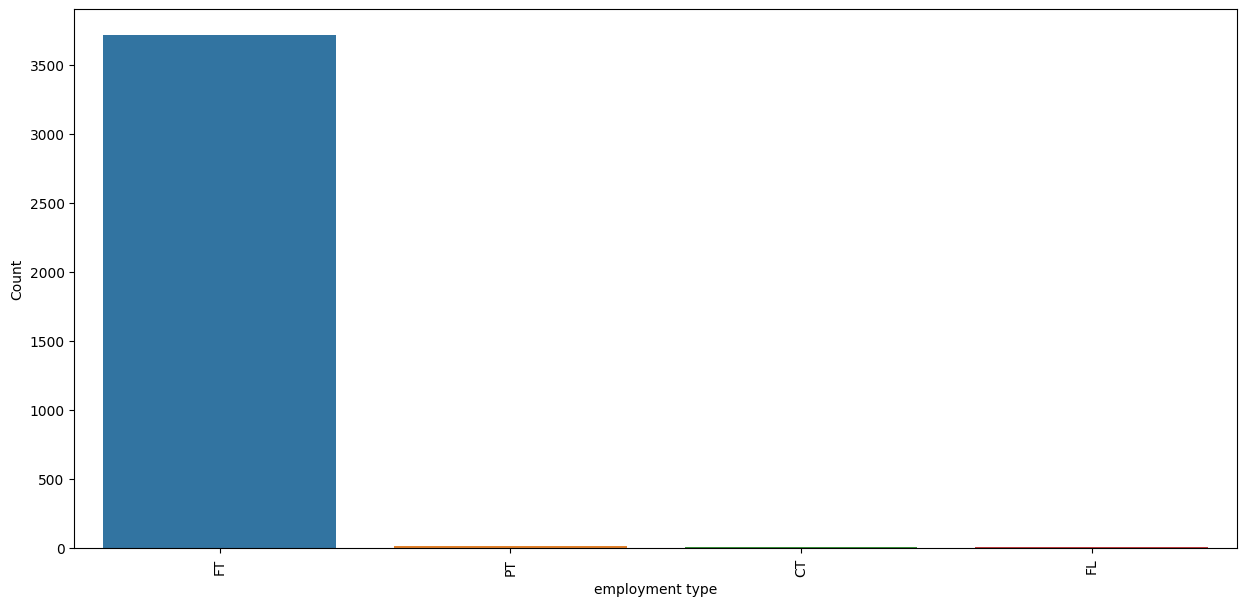

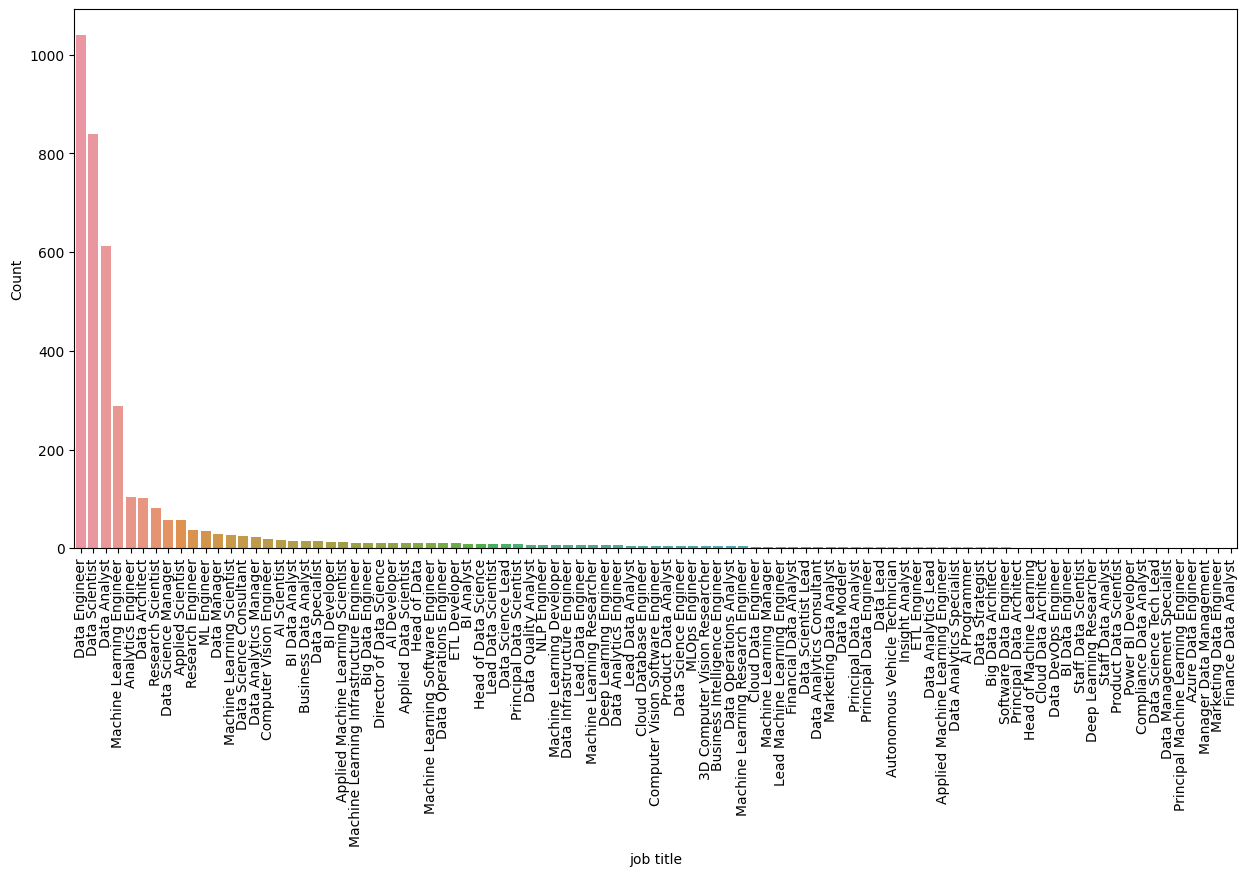

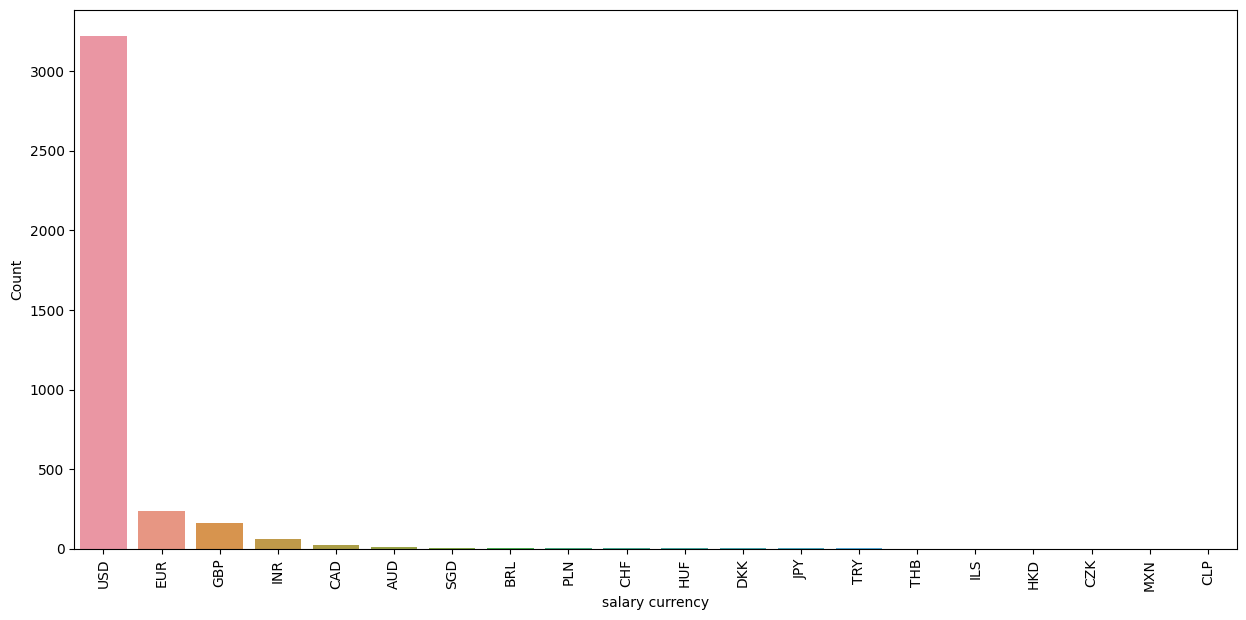

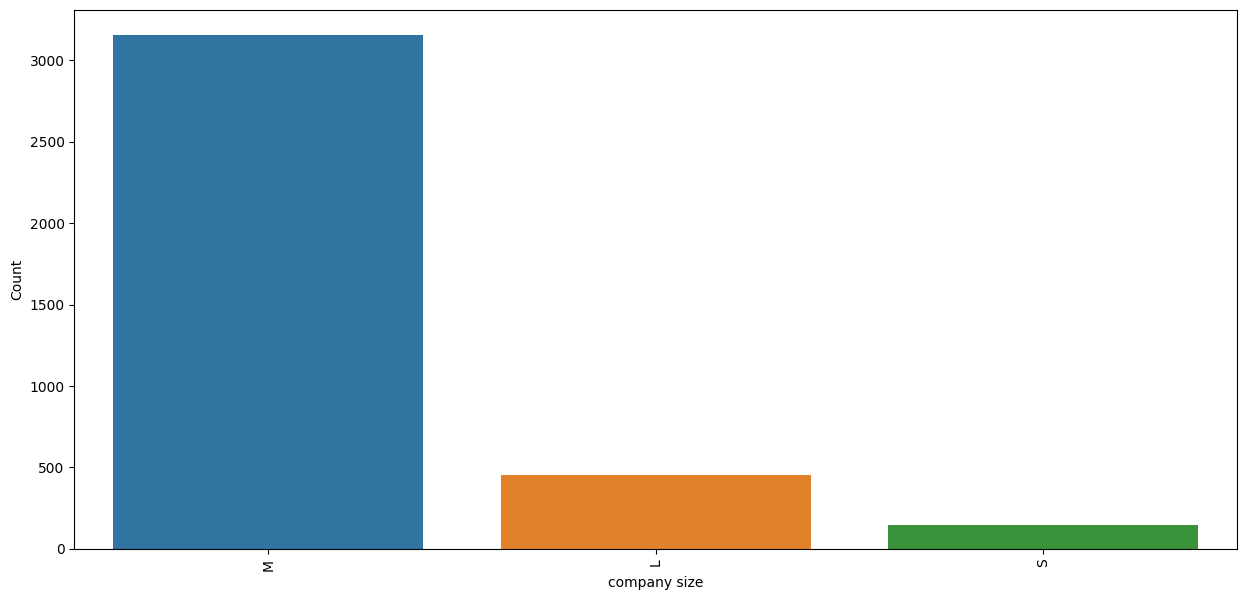

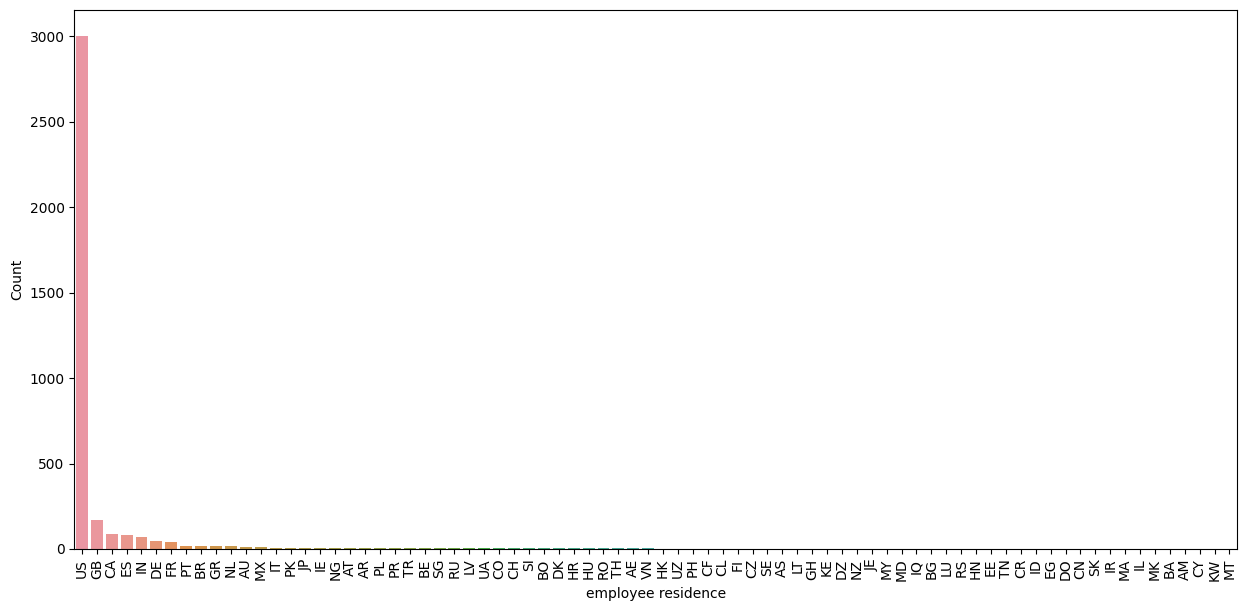

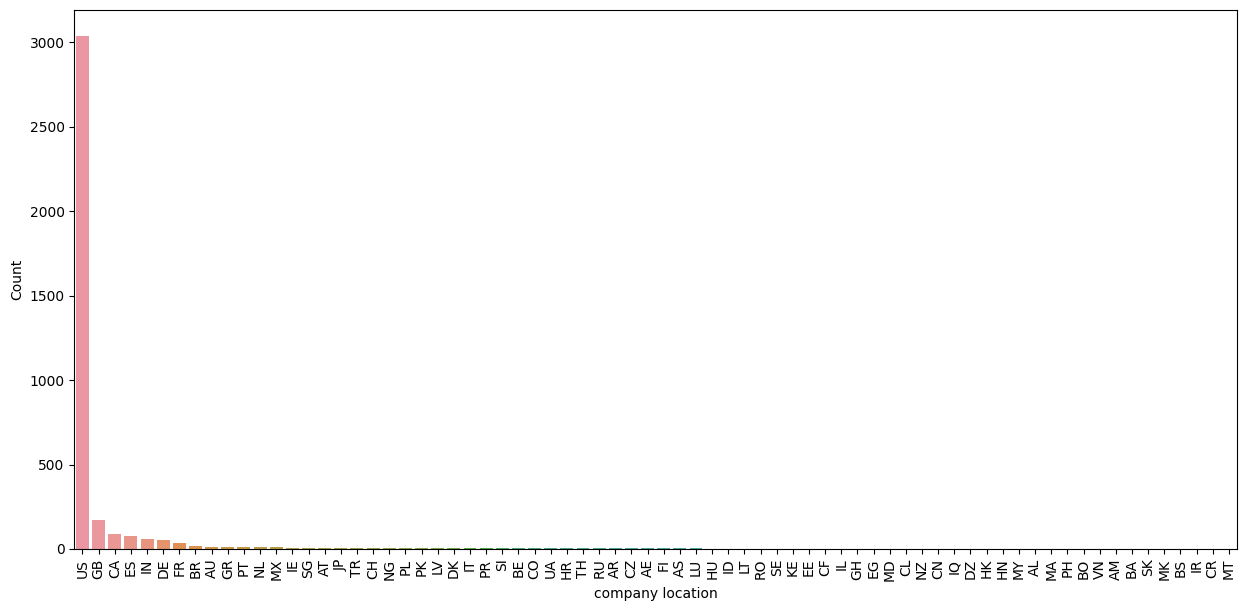

In [10]:
a=["experience_level","employment_type","job_title","salary_currency","company_size","employee_residence","company_location"]
for i in a:
    plt.figure(figsize=(15,7))
    sns.barplot(x=data_categorical[i].value_counts().index,y=data_categorical[i].value_counts().values)
    a = i.replace("_"," ")
    plt.xlabel(f'{a}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

# Vizualization

### WordCloud

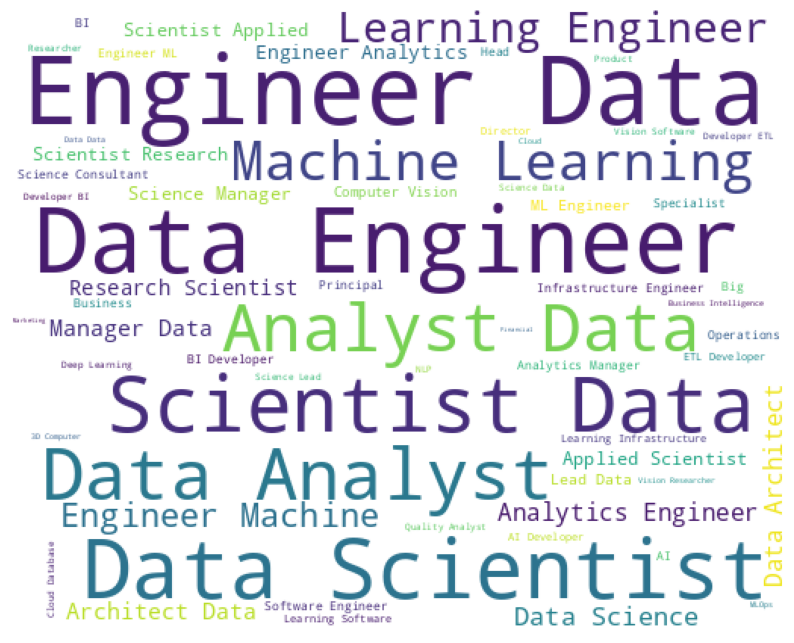

In [11]:
from wordcloud import WordCloud
plt.subplots(figsize =(10,10))

wordcloud = WordCloud(
        background_color = 'white',
        width = 512,
        height = 412
).generate(" ".join(data.job_title))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

### bar plots

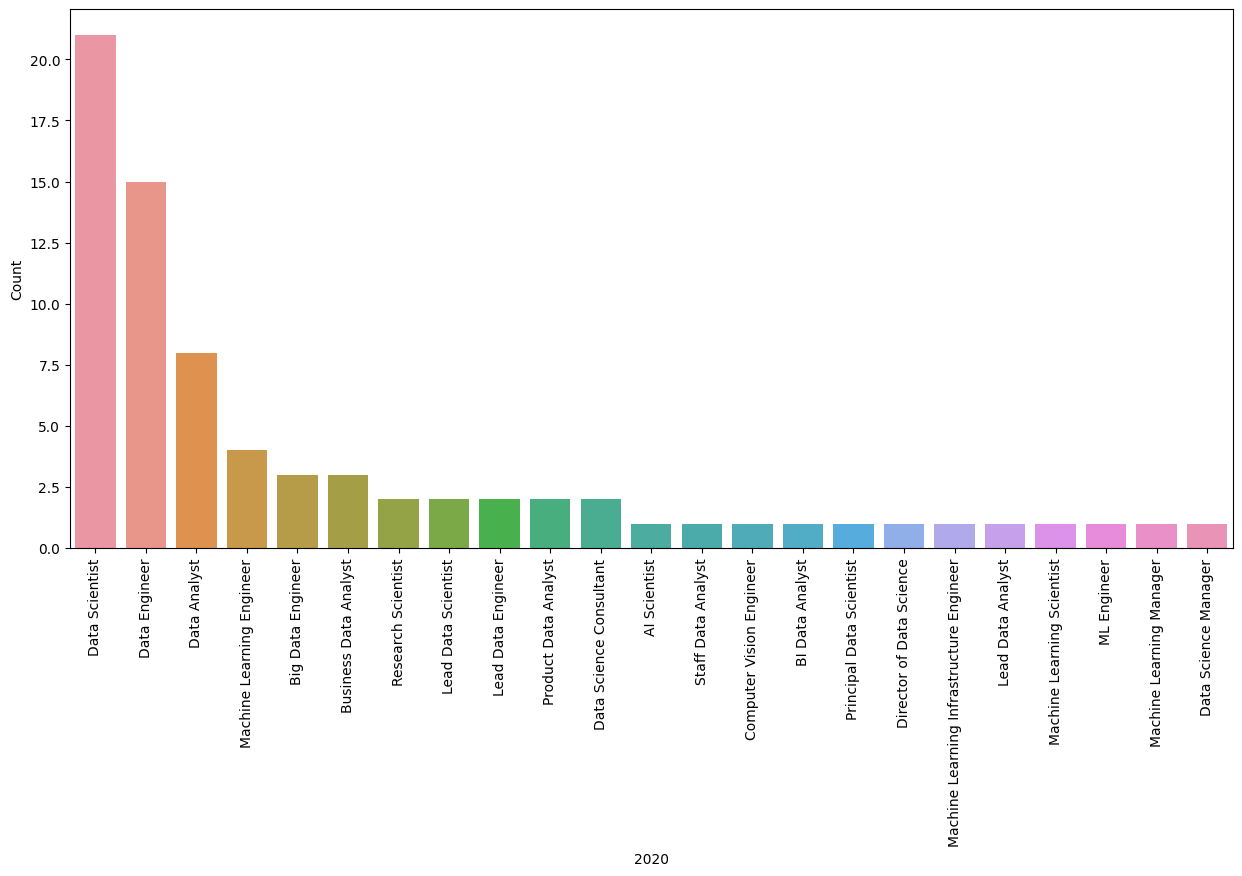

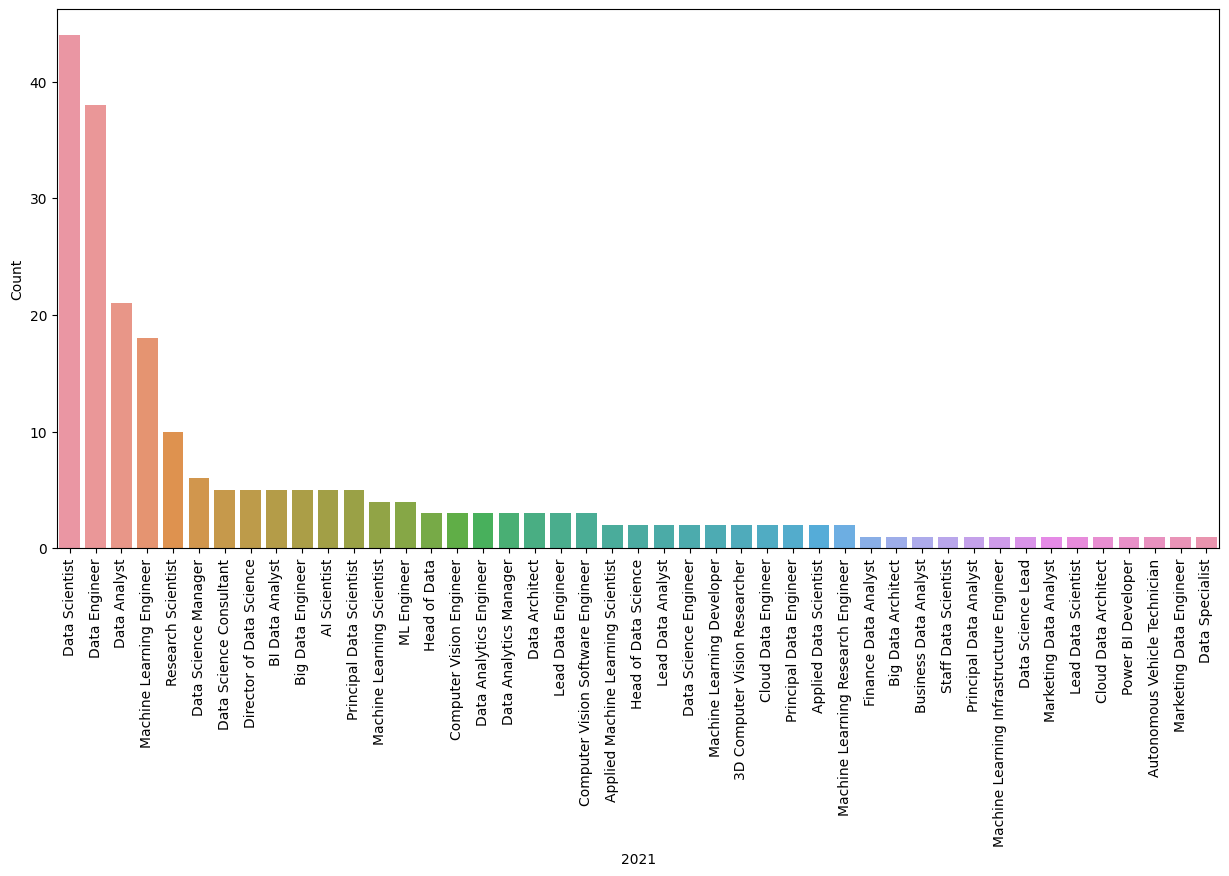

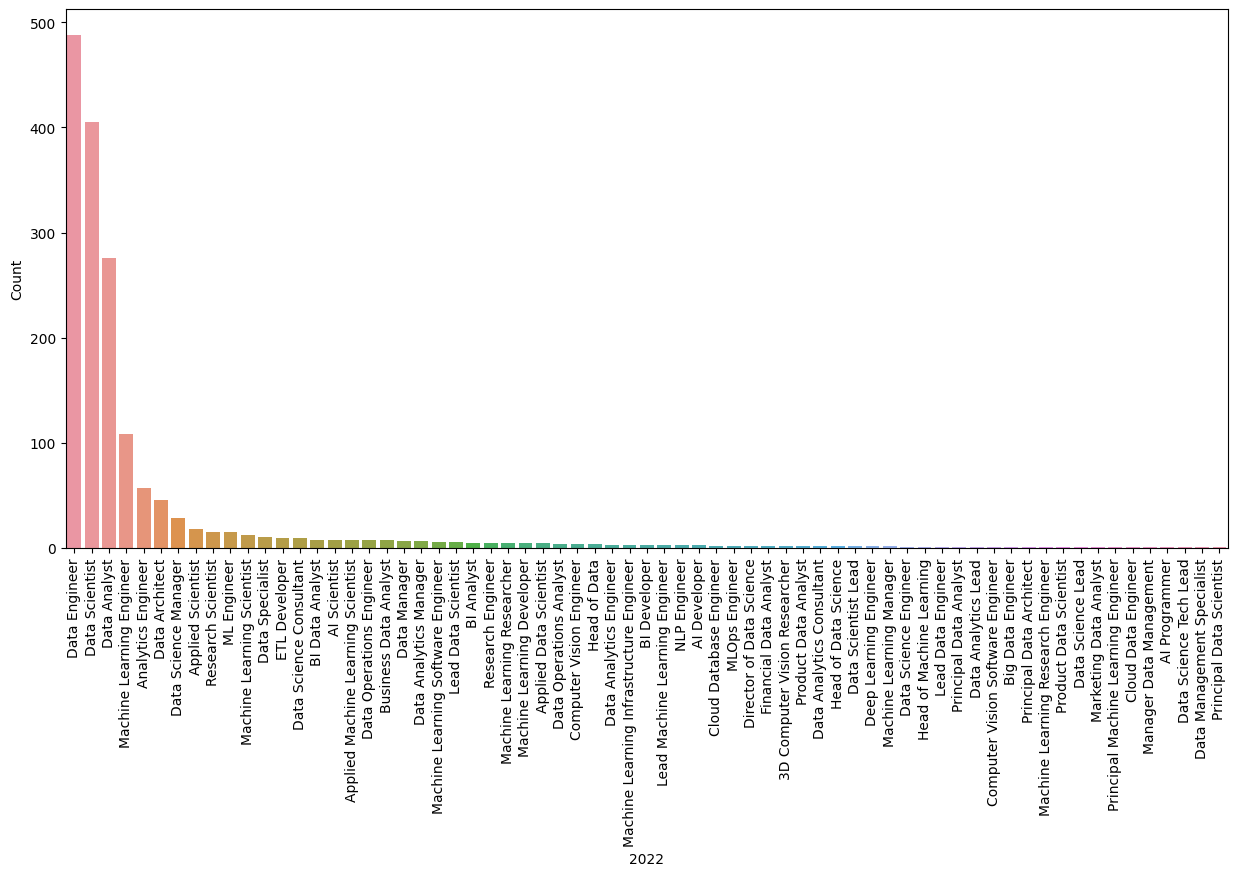

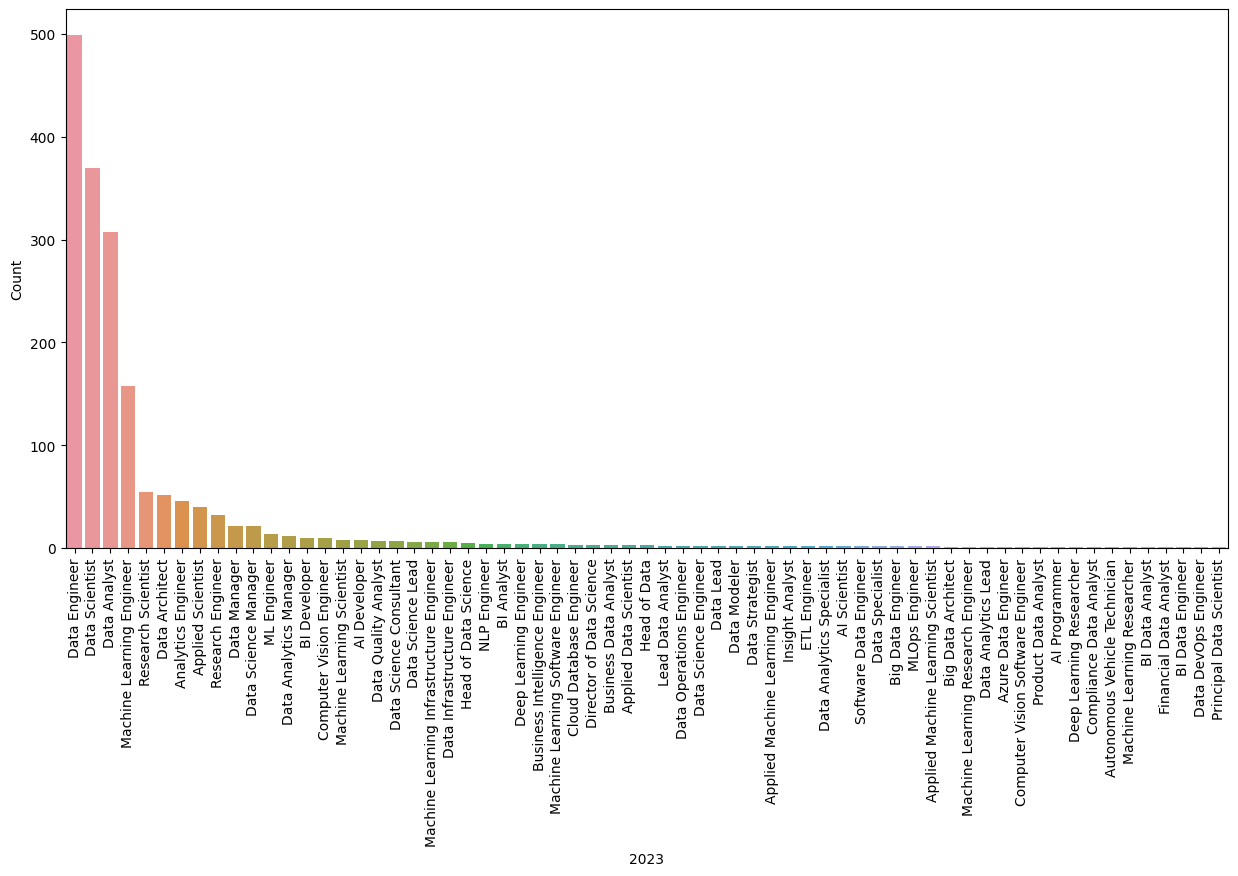

In [12]:
# Number of employees by years
b = [2020,2021,2022,2023]
for i in b:
    data_=data[data['work_year']==i]
    plt.figure(figsize=(15,7))
    sns.barplot(x=data_['job_title'].value_counts().index,y=data_['job_title'].value_counts().values)
    
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    


(array([0, 1, 2, 3]),
 [Text(0, 0, 'EX'), Text(1, 0, 'SE'), Text(2, 0, 'MI'), Text(3, 0, 'EN')])

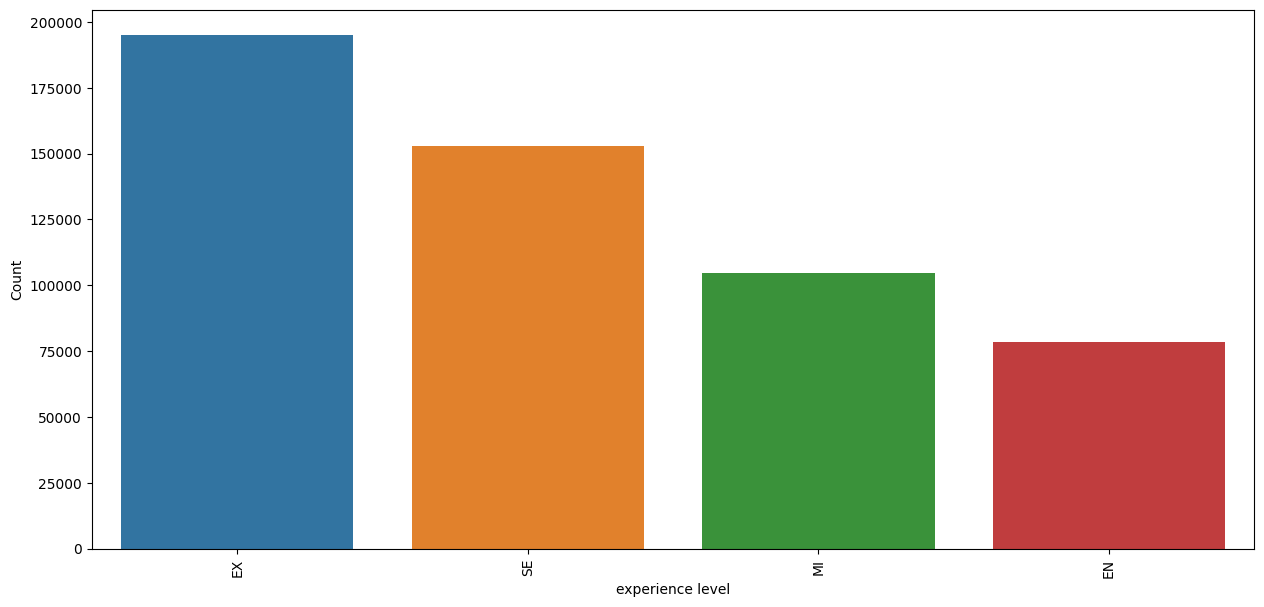

In [13]:

data_= data[['experience_level','salary_in_usd']].groupby(['experience_level'],as_index=False).mean().sort_values(by='salary_in_usd',ascending=False)

plt.figure(figsize=(15,7))

sns.barplot(x=data_['experience_level'],y=data_['salary_in_usd'])    
plt.xlabel('experience level')
plt.ylabel('Count')
plt.xticks(rotation=90)

# swarm plot

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 80.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 61.6% of the points cannot be plac

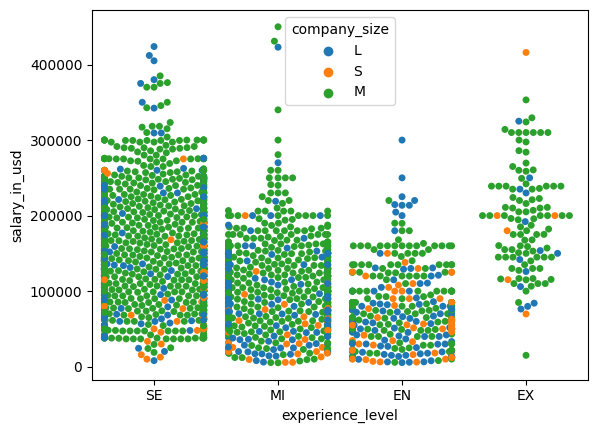

In [14]:
sns.swarmplot(x="experience_level", y="salary_in_usd",hue="company_size", data=data)
plt.show()